In [1]:
from markovsoccer.team_model import TeamModel
from markovsoccer.features import SideUsage, SideUsageShot, InwardsOutwardsPreference, SpeedOfPlay, LongBalls, \
    LongGoalKicks, SuccessfulCounterattackProbability, AbilityToCreateShootingOpportunities

In [2]:
model_path = "../models/Man City.prism"
team_model = TeamModel.read_from(model_path)

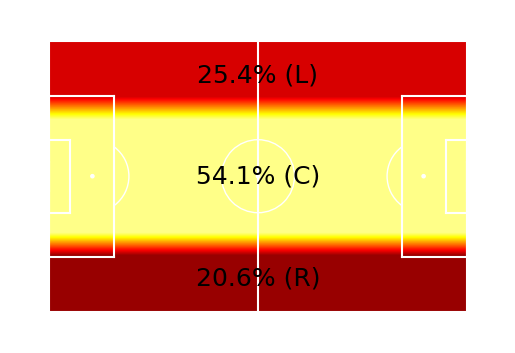

In [3]:
SideUsage.visualize(team_model)

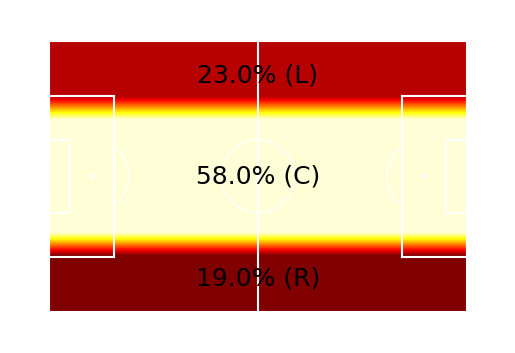

In [4]:
SideUsageShot.visualize(team_model)

In [5]:
InwardsOutwardsPreference.calculate(team_model)

{'inwards': 0.375, 'outwards': 0.19}

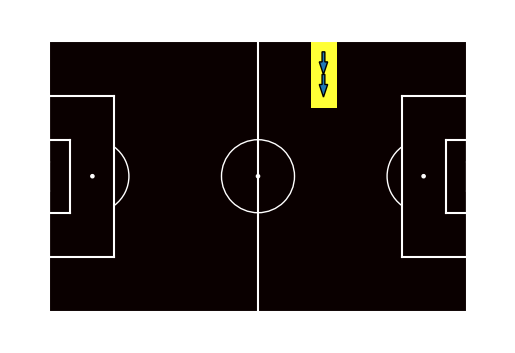

In [5]:
InwardsOutwardsPreference.visualize_most_likely_subsequences(team_model, 1)

In [6]:
SpeedOfPlay.calculate(team_model)

14.191862001227488

In [ ]:
LongBalls.calculate(team_model)  # check again

In [8]:
LongGoalKicks.calculate(team_model)

0.043076923076923075

In [13]:
SuccessfulCounterattackProbability.calculate(team_model)  # check error

IndexError: list index out of range

In [12]:
AbilityToCreateShootingOpportunities.calculate(team_model)  # check again

0.1359949774539736